# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [9]:
cancer_df = pd.read_csv("cancer.csv")

In [10]:
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [7]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [14]:
cancer_df.shape
#print(cancer_df.describe())

(699, 11)

In [13]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [ ]:
# Bare Nuclei is object and seems to have bad values 

In [17]:
cancer_df_bkp = cancer_df.copy()   # taking backup

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [15]:
cancer_df.applymap(np.isreal)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,False,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,True
3,True,True,True,True,True,True,False,True,True,True,True
4,True,True,True,True,True,True,False,True,True,True,True
5,True,True,True,True,True,True,False,True,True,True,True
6,True,True,True,True,True,True,False,True,True,True,True
7,True,True,True,True,True,True,False,True,True,True,True
8,True,True,True,True,True,True,False,True,True,True,True
9,True,True,True,True,True,True,False,True,True,True,True


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [32]:
cancer_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [40]:
cancer_df.replace('?', np.nan,inplace=True)

In [41]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [42]:
cancer_df.groupby('Bare Nuclei').size()

Bare Nuclei
1     402
10    132
2      30
3      28
4      19
5      30
6       4
7       8
8      21
9       9
dtype: int64

In [ ]:
#Number of '?' are 16

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [48]:
cancer_df.fillna(cancer_df.median(),inplace=True)
#cancer_df['Bare Nuclei'].fillna(cancer_df['Bare Nuclei'].median())

In [51]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype(int)

In [52]:
cancer_df.groupby('Bare Nuclei').size()


Bare Nuclei
1     418
2      30
3      28
4      19
5      30
6       4
7       8
8      21
9       9
10    132
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable

In [55]:
cancer_df_r = cancer_df.drop('ID', axis=1)

cancer_df_r.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [1]:
#Let us check for pair plots

C:\Users\Rishu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rishu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


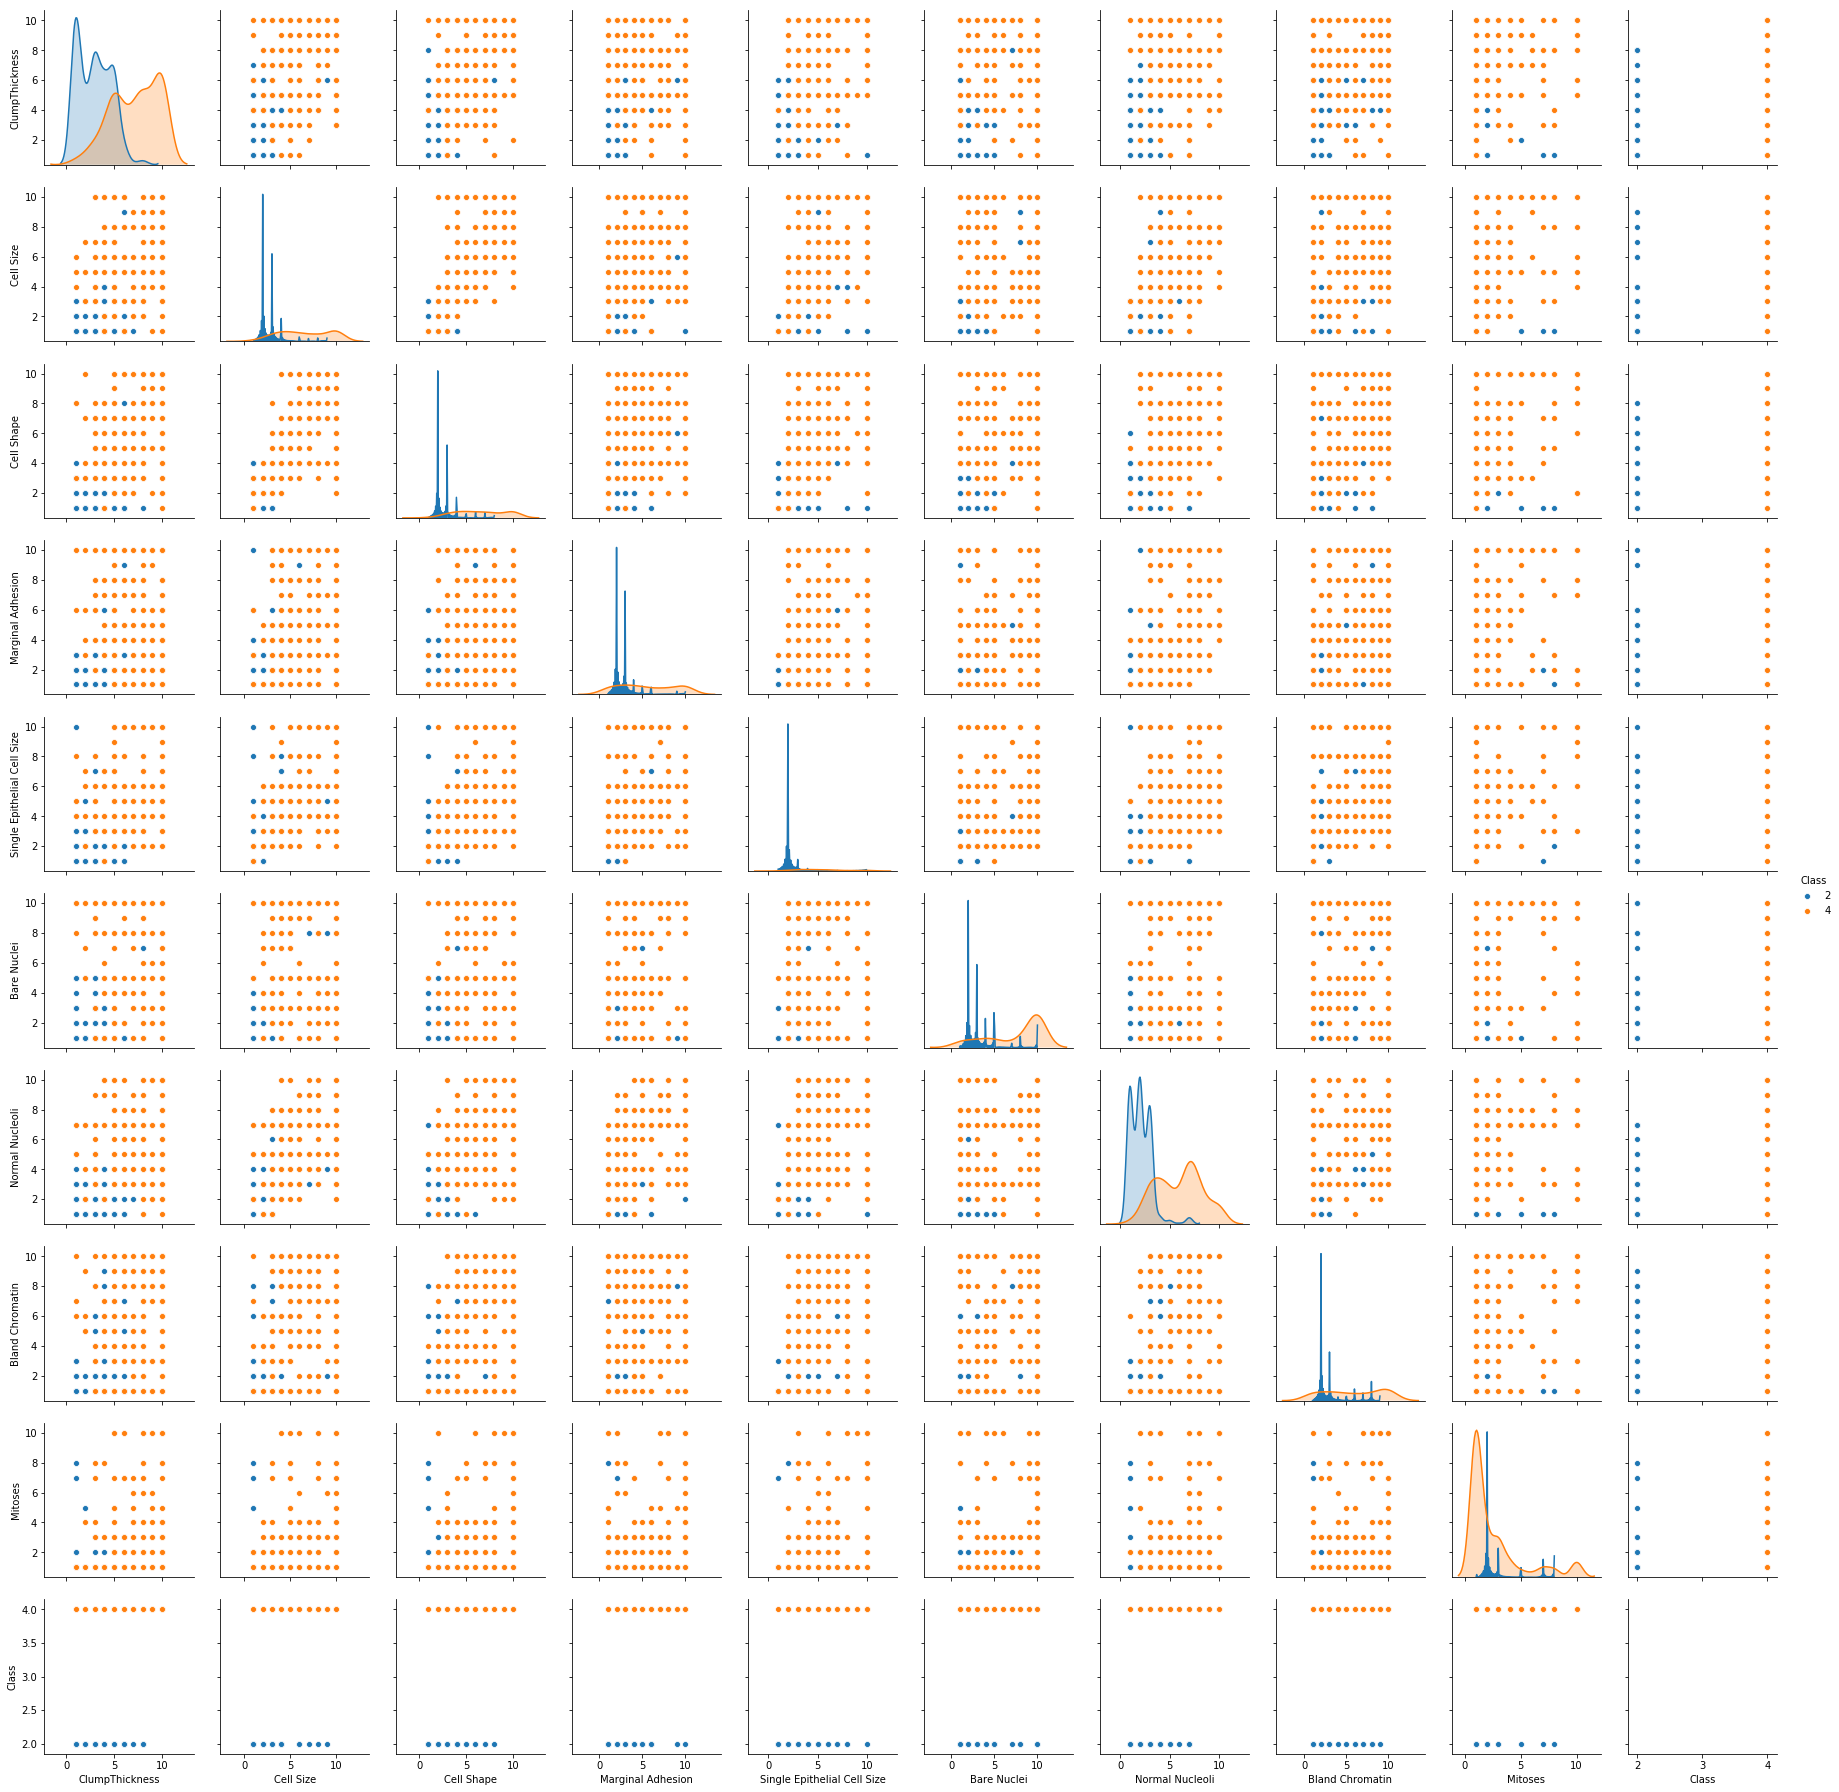

In [60]:
sns.pairplot(cancer_df_r,hue="Class" )

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [85]:
# dropping column "Mitoses" as it doesnt seem to have a goog correlation with the target as well as other varibale
#cancer_df_r_bkp = cancer_df_r.copy()
cancer_df_r = cancer_df_r_bkp.copy()

cancer_df_r2 = cancer_df_r.drop('Mitoses', axis=1)


In [86]:
cancer_df_r2.shape

(699, 9)

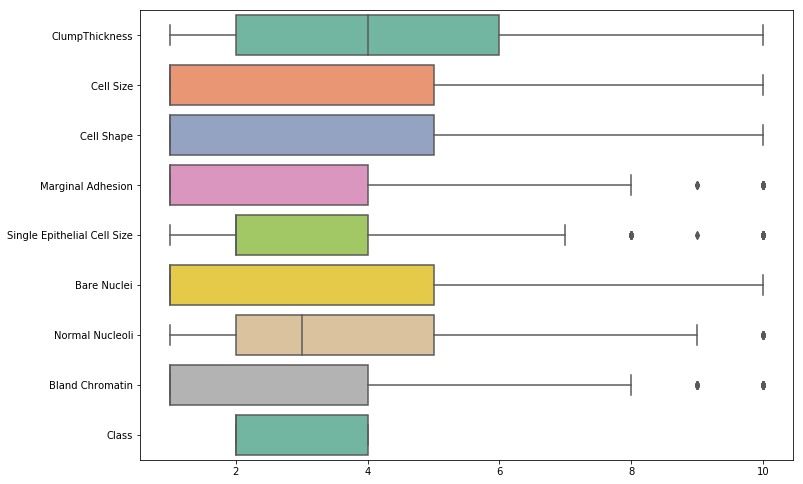

In [87]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,data=cancer_df_r2, orient="h", palette="Set2")

In [94]:
from scipy.stats import zscore

cancer_df_attr = cancer_df_r2.loc[:, 'ClumpThickness':'Bland Chromatin']  # Extracting only the numeric coumns (all columns except target)
cancer_df_target = cancer_df_r2.loc[:, 'Class']
cancer_df_attr_z = cancer_df_attr.apply(zscore)

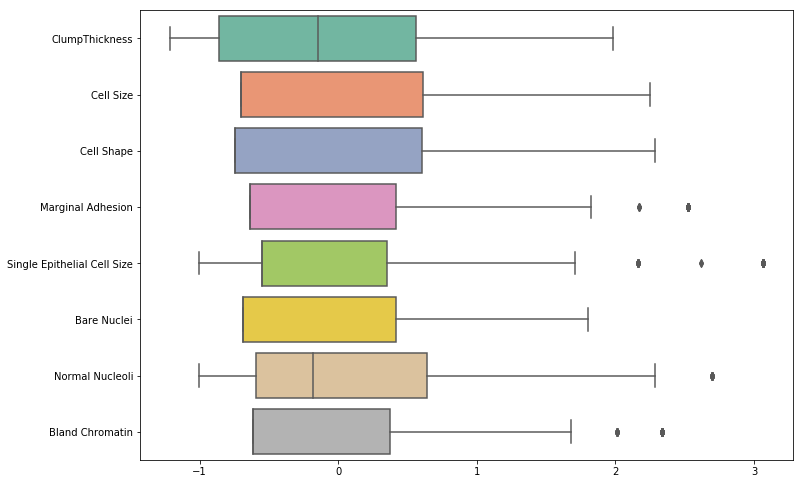

In [95]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,data=cancer_df_attr_z, orient="h", palette="Set2")

In [92]:
# Not too many outliers detected compared to overall data , sonot treating them
#***********************************************************************************
#A simple function that takes as input a column, find's its median, identifies outliers, replaces outliers with median     
#def replace(x):
#    median, std = x.median(), x.std()  #Get the median and the standard deviation of every column
#    outliers = (x - median).abs() > 2*std # Subtract median from every member of each column. Take absolute values > 2std
#    x[outliers] = x.median()       
#    return x
#
#cancer_df_cor = cancer_df_attr_z.apply(lambda x:x.transform(replace)) # transforming raw data using replace function

In [0]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [101]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

Y = cancer_df_r2[['Class']]
X = cancer_df_r2.drop('Class', axis=1)

#print(Y)
#print(X)



In [102]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=0)

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)


C:\Users\Rishu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rishu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [103]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00179211 0.64406088 0.64464435 0.49167857 0.53188417 0.57271011
  0.5650319  0.52754338]
 [0.64406088 1.00179211 0.91113307 0.72336343 0.7476022  0.67480162
  0.76107779 0.72581423]
 [0.64464435 0.91113307 1.00179211 0.70632678 0.72116939 0.69041141
  0.73063955 0.72302195]
 [0.49167857 0.72336343 0.70632678 1.00179211 0.59903633 0.67019442
  0.67746408 0.61187762]
 [0.53188417 0.7476022  0.72116939 0.59903633 1.00179211 0.57300568
  0.61205701 0.64255978]
 [0.57271011 0.67480162 0.69041141 0.67019442 0.57300568 1.00179211
  0.65217187 0.58188549]
 [0.5650319  0.76107779 0.73063955 0.67746408 0.61205701 0.65217187
  1.00179211 0.67157544]
 [0.52754338 0.72581423 0.72302195 0.61187762 0.64255978 0.58188549
  0.67157544 1.00179211]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [104]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.31016173  0.89144667  0.00404776  0.01732351  0.06558345 -0.23175385
  -0.20242505 -0.09909138]
 [ 0.39193383 -0.0382936  -0.74141309  0.16205328 -0.05059223  0.44406789
   0.0338507  -0.26089291]
 [ 0.38808564 -0.00402904  0.65963106  0.13243251 -0.04993379  0.60242852
  -0.01832274 -0.17599027]
 [ 0.34546195 -0.34914512  0.03393021 -0.43517313 -0.14601995 -0.2988109
  -0.57782034 -0.35176795]
 [ 0.34199075 -0.13122728  0.0597005   0.5098442  -0.62062583 -0.40474946
   0.18681014  0.13571991]
 [ 0.34009619  0.06826624 -0.05952845 -0.60890381 -0.22814872  0.14880692
   0.22156831  0.61812536]
 [ 0.35790153 -0.12521479  0.08041984 -0.1498328   0.44573857 -0.32171792
   0.65265077 -0.31491619]
 [ 0.34571167 -0.21066147 -0.02123021  0.3367043   0.57741916 -0.08612631
  -0.33722781  0.51742773]]

 Eigen Values 
%s [5.62435585 0.54016916 0.08675373 0.49365322 0.37872556 0.26753406
 0.29530666 0.32783867]


# Q8 Find variance and cumulative variance by each eigen vector

In [106]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7
0,5.624356,0.540169,0.086754,0.493653,0.378726,0.267534,0.295307,0.327839


In [105]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance", cum_var)

Cumulative Variance [ 70.17867986  76.91871551  83.078342    87.80394271  91.89459523
  95.57932498  98.91751837 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(X)
X_transform = pca.transform(X)


In [109]:
X_transform

array([[-4.37850891e+00,  6.33733189e-02, -1.73145161e+00, ...,
         8.04274177e-01,  8.14168484e-01, -7.67528213e-03],
       [ 4.97559585e+00, -4.81936923e+00,  9.58102507e-01, ...,
        -3.17678330e+00,  1.70442514e+00, -4.52474273e-02],
       [-4.53564238e+00, -6.25833263e-01,  4.10064923e-02, ...,
         7.68422662e-01,  6.26743874e-01,  4.32889017e-02],
       ...,
       [ 1.03592571e+01,  7.55854746e+00,  7.27250823e-01, ...,
         1.59020993e+00, -2.54585330e-01, -2.25453047e-01],
       [ 6.59214658e+00,  2.88820679e+00,  1.88311621e+00, ...,
         5.29417194e+00,  1.04121807e-01,  1.22170605e+00],
       [ 7.69396407e+00,  1.53516436e+00,  2.05093547e+00, ...,
         4.85038631e+00,  1.02667377e-02, -2.64974155e-01]])

In [112]:
pca.components_

array([[ 3.00697577e-01,  4.07268541e-01,  3.95289378e-01,
         3.33721525e-01,  2.50875902e-01,  4.44261689e-01,
         2.95021413e-01,  3.58810191e-01],
       [-4.81902832e-02,  2.39554125e-01,  1.80320401e-01,
        -1.11866751e-01,  1.75867373e-01, -7.85587148e-01,
         3.34878406e-02,  4.96048350e-01],
       [-8.50526498e-01, -1.85989679e-02, -6.86499623e-02,
         4.78792151e-01,  4.92631411e-02,  7.14051104e-02,
         1.14539420e-01,  1.47170609e-01],
       [ 4.08062548e-02,  3.25340845e-01,  2.40397090e-01,
         3.77487738e-01,  1.84385820e-01, -3.28869919e-01,
         6.26120189e-04, -7.41651188e-01],
       [-4.18329314e-01,  2.95857608e-01,  3.36310514e-01,
        -6.87690232e-01,  2.54023835e-01,  2.36276196e-01,
        -1.26698123e-02, -1.75872600e-01],
       [-3.61533424e-02,  4.97378841e-02,  4.25533976e-02,
        -1.47444615e-01, -5.14795250e-01, -1.08158200e-01,
         8.25454290e-01, -1.20752817e-01],
       [ 7.66388828e-02, -2.290072

# Q10 Find correlation between components and features

In [113]:
# back to dataframe
cancer_pca_df = pd.DataFrame(X_transform, columns = ['ClumpThickness', 'Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli','Bland Chromatin'])

In [116]:
cancer_pca_df


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,-4.378509,0.063373,-1.731452,0.094436,-0.937384,0.804274,0.814168,-0.007675
1,4.975596,-4.819369,0.958103,0.522050,1.429092,-3.176783,1.704425,-0.045247
2,-4.535642,-0.625833,0.041006,-0.316046,0.135551,0.768423,0.626744,0.043289
3,5.276616,3.749701,-2.046218,-1.156723,2.977080,-0.149627,-3.647061,0.616458
4,-4.011763,-0.112170,0.076659,0.808606,-1.894435,0.545538,0.561635,-0.101033
5,15.258380,-0.099124,0.742495,1.466860,0.948660,1.175132,0.013673,-0.171177
6,-1.582944,-6.814150,2.313300,-3.028618,2.862419,-0.024536,0.200291,0.510716
7,-4.885312,0.388265,0.751478,0.212415,0.653914,0.955288,0.149762,-0.687577
8,-5.870644,0.140968,0.591049,-0.029235,0.342943,-0.738174,-0.333835,0.140342
9,-4.566959,0.317630,-1.014064,0.378345,-0.210527,0.064711,0.049479,0.795174


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [117]:
jokes_df = pd.read_csv("jokes.csv")

In [119]:
jokes_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [123]:
ratings_df = jokes_df.iloc[0:200, 1:]

In [124]:
ratings_df.shape

(200, 100)

In [127]:
#ratings_df.info()

# Q22 Change the column indices from 0 to 99

In [132]:
ratings_df.columns = range(0,100)

In [134]:
#ratings_df

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [136]:
ratings_df.replace(99.00,0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [137]:
sc = StandardScaler()
ratings_diff = sc.fit_transform(ratings_df) 


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [144]:
ratings_final = pd.DataFrame(ratings_diff)

In [147]:
ratings_final.mean(axis=0).sort_values(ascending=False).head(10)

87    2.831069e-16
84    2.642331e-16
3     2.536860e-16
95    2.342571e-16
72    2.153833e-16
70    1.743050e-16
93    1.676437e-16
83    1.665335e-16
96    1.476597e-16
63    1.426637e-16
dtype: float64